In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [112]:
df=pd.read_csv("TaxiFare.csv")

In [113]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [115]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [116]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [117]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [118]:
df.shape

(50000, 8)

In [119]:
df.drop("unique_id",axis=1,inplace=True)

In [120]:
df.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

<Axes: xlabel='no_of_passenger'>

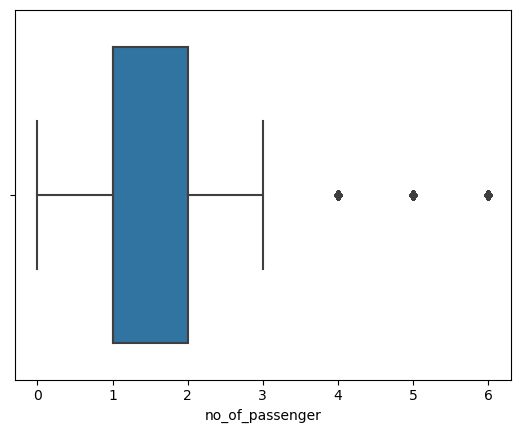

In [121]:
sns.boxplot(x="no_of_passenger",data=df)

In [122]:
import datetime
from math import sqrt

for i, row in df.iterrows():
    dt = datetime.datetime.strptime(row['date_time_of_pickup'], '%Y-%m-%d %H:%M:%S UTC')
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['longitude_of_dropoff'] - row['longitude_of_pickup']) * 54.6 
    y = (row['latitude_of_dropoff'] - row['latitude_of_pickup']) * 69.0   
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance
    
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_week,pickup_time,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.0,17.0,0.641024
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,1.0,16.0,5.275538
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,3.0,0.0,0.872636
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,5.0,4.0,1.738444
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.0,7.0,1.253707


In [123]:
df.drop(columns=['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff'], inplace=True)
df.head()

,amount,no_of_passenger,day_of_week,pickup_time,distance
0,4.5,1,0.0,17.0,0.641024
1,16.9,1,1.0,16.0,5.275538
2,5.7,2,3.0,0.0,0.872636
3,7.7,1,5.0,4.0,1.738444
4,5.3,1,1.0,7.0,1.253707


In [124]:
corr_matrix = df.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount             1.000000
no_of_passenger    0.016583
distance           0.012715
day_of_week        0.000520
pickup_time       -0.022018
Name: amount, dtype: float64

In [125]:
df.describe()

,amount,no_of_passenger,day_of_week,pickup_time,distance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,1.667840,3.029980,13.489080,11.346051
std,9.685557,1.289195,1.956936,6.506935,232.331387
min,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,1.000000,9.000000,0.773567
50%,8.500000,1.000000,3.000000,14.000000,1.338672
75%,12.500000,2.000000,5.000000,19.000000,2.449626
max,200.000000,6.000000,6.000000,23.000000,24861.003946


In [126]:
df.dtypes

amount             float64
no_of_passenger      int64
day_of_week        float64
pickup_time        float64
distance           float64
dtype: object

In [127]:
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['amount'] > 0.0) & (df['amount'] < 50.0)]
df.shape

(30704, 5)

In [128]:
X=df.drop(['amount'],axis=1)
Y=df[['amount']]

In [129]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.30,random_state=0)

In [130]:
mode1=LinearRegression()
mode1.fit(Xtrain,Ytrain)

LinearRegression()

In [131]:
mode1.score(Xtrain,Ytrain)

0.7219966379938638

In [132]:
mode1.score(Xtest,Ytest)

0.7246146757546559

In [133]:
from sklearn.tree import DecisionTreeRegressor

In [134]:
model2=DecisionTreeRegressor(max_depth=15)

In [135]:
model2.fit(Xtrain,Ytrain)

DecisionTreeRegressor(max_depth=15)

In [136]:
model2.score(Xtest,Ytest)

0.5729860255394295